In [3]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# FUNCION PARA CALCULAR EL FACTOR DE INFLUENCIA
def wo(m, n):

    W = 1/(4*np.pi)

    AN = (2*m*n*(m**2+n**2+1)**0.5)
    AD = (m**2+n**2+1)+m**2*n**2

    A = AN/AD
    BN = m**2+n**2+2
    BD = m**2+n**2+1

    B = BN/BD

    CN = 2*m*n*(m**2+n**2+1)**0.5

    CD = (m**2+n**2+1)-m**2*n**2

    C = np.arctan(CN/CD)

    if (n**2*m**2) < (m**2+n**2+1):

        wo = W*(A*B+C)

    else:

        wo = W*(A*B+np.pi+C)

    return wo

In [5]:
# CREACION DE PUNTOS PARA EL MONOGRAMA
ml = np.arange(0, 2.1, 0.1)
nl = np.arange(0, 2.51, 0.01)
Io = []
for i in ml:
    a = []
    for j in nl:
        a.append(wo(i, j))
    Io.append(a)

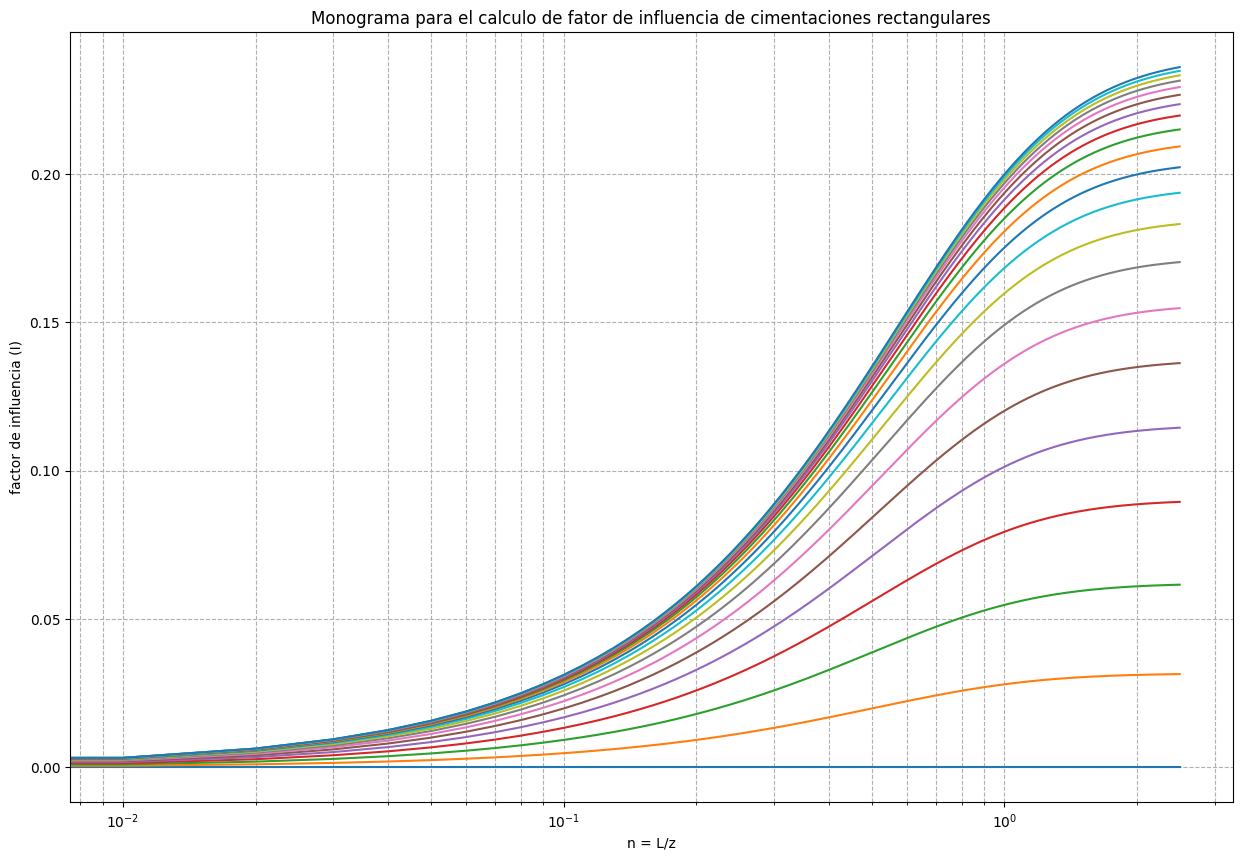

In [6]:
# Trazar n en el eje x y I en el eje y
plt.figure(figsize=(15, 10))

for i, fila in enumerate(Io):
    plt.plot(nl, fila, label=f'm = {i}')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('n = L/z')
plt.ylabel('factor de influencia (I)')
plt.title(
    'Monograma para el calculo de fator de influencia de cimentaciones rectangulares')

# Convertir el eje x en una escala logarítmica
plt.xscale('log')

# activar grillas logaritmicas
plt.grid(True, which="both", ls="--")

# Mostrar el gráfico
plt.show()

In [17]:
# INGRESO DE DATOS
B = 2.0           # Ancho de la cimentacion               (m)
L = 2.0           # Largo de la cimentacion               (m)
z = 1.5           # Profundidad de calculo de presion     (m)
Q = 27000         # Carga total                           (kN)

In [18]:
# CALCULO DE FACTOR DE INFLUENCIA
m = B/z
n = L/z
Io = wo(m, n)
σz = Q/(B*L)
print(f'Factor de influencia = {np.round(Io, decimals=2)}')
print(f'Presion de contacto = {np.round(Io*σz,decimals=2)} N/m²')

Factor de influencia = 0.21
Presion de contacto = 1390.36 N/m²
